# Getting Individual Performance from S&P 500 stocks

Based on the composition of the IVV etf that is available here:
https://www.ishares.com/us/products/239726/ishares-core-sp-500-etf/1467271812596.ajax?fileType=csv&fileName=IVV_holdings&dataType=fund&asOfDate=20220131

We are going to save the composition's data on a CSV file, and then we are going to get the historical return for each stock of the ETF between 28 January 2022 and 5 March 2022, from the Yahoo Finance and save it on .xlsx file for later use.

Getting, cleaning, and making easily available the data is a important process for a Data Science project. Today the focus of our Jupyter Notebook is to prepare our data for the next projects.

### Libraries

In [3]:
#These first two will help me to do the web scrapping
import requests

#This one will help me to organize the data
import pandas as pd
import yfinance as yf
import numpy as np

### Collecting the Historical Composition

In [28]:
#Link with the file containing the historical composition
link = 'https://www.ishares.com/us/products/239726/ishares-core-sp-500-etf/1467271812596.ajax?fileType=csv&fileName=IVV_holdings&dataType=fund&asOfDate=20220131'

#Getting the data from the website and saving in a csv file
req = requests.get(link)
url_content = req.content
csv_file = open('downloaded.csv', 'wb')
csv_file.write(url_content)
csv_file.close()

Saving the content in a DataFrame

In [30]:
raw_df = pd.read_csv('downloaded.csv',index_col = 0, skiprows = 9, skipfooter = 2, sep = ',')
raw_df

<ipython-input-30-db9d4ab9dcd5>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  raw_df = pd.read_csv('downloaded.csv',index_col = 0, skiprows = 9, skipfooter = 2, sep = ',')


,Name,Sector,Asset Class,Market Value,Weight (%),Notional Value,Shares,Price,Location,Exchange,Currency,FX Rate,Market Currency,Accrual Date
Ticker,,,,,,,,,,,,,,
AAPL,APPLE INC,Information Technology,Equity,"22,658,895,875.52",7.10,"22,658,895,875.52","129,642,384.00",174.78,United States,NASDAQ,USD,1.0,USD,-
MSFT,MICROSOFT CORP,Information Technology,Equity,"19,419,793,560.36",6.09,"19,419,793,560.36","62,447,082.00",310.98,United States,NASDAQ,USD,1.0,USD,-
AMZN,AMAZON COM INC,Consumer Discretionary,Equity,"10,852,825,808.28",3.40,"10,852,825,808.28","3,627,924.00","2,991.47",United States,NASDAQ,USD,1.0,USD,-
GOOGL,ALPHABET INC CLASS A,Communication,Equity,"6,769,261,165.70",2.12,"6,769,261,165.70","2,501,510.00","2,706.07",United States,NASDAQ,USD,1.0,USD,-
TSLA,TESLA INC,Consumer Discretionary,Equity,"6,336,390,920.40",1.99,"6,336,390,920.40","6,764,445.00",936.72,United States,NASDAQ,USD,1.0,USD,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GPS,GAP INC,Consumer Discretionary,Equity,"32,221,141.03",0.01,"32,221,141.03","1,783,129.00",18.07,United States,New York Stock Exchange Inc.,USD,1.0,USD,-
UA,UNDER ARMOUR INC CLASS C,Consumer Discretionary,Equity,"28,667,175.81",0.01,"28,667,175.81","1,792,819.00",15.99,United States,New York Stock Exchange Inc.,USD,1.0,USD,-
UAA,UNDER ARMOUR INC CLASS A,Consumer Discretionary,Equity,"27,350,424.36",0.01,"27,350,424.36","1,452,492.00",18.83,United States,New York Stock Exchange Inc.,USD,1.0,USD,-


## Getting the Historical Price for each asset

In [6]:
def getHistoricReturns(df):
    '''
    Giving the DataFrame with the Assets on the Index the function
    collects the historical performance of the individual assets
    '''
    basket_returns = []
    columns = []
    
    #Subsetting only the assets that are equity
    index = df['Asset Class'].values == "Equity"
    equities = df[index]
    
    for asset in equities.index:
        security = yf.Ticker(asset).history(start="2022-01-28")['Close']
        if security.empty:
            print('Erro', asset)
            return None
        basket_returns.append(security)
        
    df = pd.concat(basket_returns, 1)
    df.columns = equities.index
    
    return df

Correcting manually some values in the composition

In [7]:
#Correcting a mistake to access the value
#This unfortunately is manual
array = raw_df.index.values
index = np.where(array == 'BRKB', 'BRK-B', array)
raw_df.index = index

array = raw_df.index.values
index = np.where(array == 'BFB', 'BF-B', array)
raw_df.index = index

raw_df

,Name,Sector,Asset Class,Market Value,Weight (%),Notional Value,Shares,Price,Location,Exchange,Currency,FX Rate,Market Currency,Accrual Date
AAPL,APPLE INC,Information Technology,Equity,"22,658,895,875.52",7.10,"22,658,895,875.52","129,642,384.00",174.78,United States,NASDAQ,USD,1.0,USD,-
MSFT,MICROSOFT CORP,Information Technology,Equity,"19,419,793,560.36",6.09,"19,419,793,560.36","62,447,082.00",310.98,United States,NASDAQ,USD,1.0,USD,-
AMZN,AMAZON COM INC,Consumer Discretionary,Equity,"10,852,825,808.28",3.40,"10,852,825,808.28","3,627,924.00","2,991.47",United States,NASDAQ,USD,1.0,USD,-
GOOGL,ALPHABET INC CLASS A,Communication,Equity,"6,769,261,165.70",2.12,"6,769,261,165.70","2,501,510.00","2,706.07",United States,NASDAQ,USD,1.0,USD,-
TSLA,TESLA INC,Consumer Discretionary,Equity,"6,336,390,920.40",1.99,"6,336,390,920.40","6,764,445.00",936.72,United States,NASDAQ,USD,1.0,USD,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GPS,GAP INC,Consumer Discretionary,Equity,"32,221,141.03",0.01,"32,221,141.03","1,783,129.00",18.07,United States,New York Stock Exchange Inc.,USD,1.0,USD,-
UA,UNDER ARMOUR INC CLASS C,Consumer Discretionary,Equity,"28,667,175.81",0.01,"28,667,175.81","1,792,819.00",15.99,United States,New York Stock Exchange Inc.,USD,1.0,USD,-
UAA,UNDER ARMOUR INC CLASS A,Consumer Discretionary,Equity,"27,350,424.36",0.01,"27,350,424.36","1,452,492.00",18.83,United States,New York Stock Exchange Inc.,USD,1.0,USD,-
NWS,NEWS CORP CLASS B,Communication,Equity,"20,251,966.40",0.01,"20,251,966.40","910,610.00",22.24,United States,NASDAQ,USD,1.0,USD,-


Saving the content, computing the daily returns, and saving it on a .xlsx file

In [8]:
data = getHistoricReturns(raw_df)
data = data.pct_change().dropna()
data.to_excel('S&P_individualComponents.xlsx')

<AxesSubplot:xlabel='Date'>

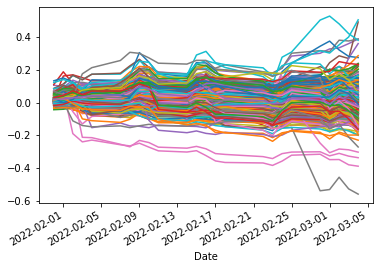

In [35]:
((cleanData+1).cumprod()-1).plot(legend = False)

In [38]:
((cleanData+1).cumprod()-1)

,AAPL,MSFT,AMZN,GOOGL,TSLA,GOOG,FB,NVDA,BRK-B,JNJ,...,NLSN,PVH,IPGP,RL,FOX,DISCA,GPS,UA,UAA,NWS
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-31,0.026126,0.008824,0.038864,0.014642,0.106776,0.018073,0.038282,0.072067,0.000383,0.002911,...,3.060113e-02,0.021174,0.070182,0.014182,0.012803,0.027993,0.016882,2.697496e-02,0.031216,0.022059
2022-02-01,0.025128,0.001622,0.050115,0.032193,0.100313,0.034429,0.057307,0.078722,0.003388,-0.005297,...,4.371589e-02,0.042992,0.050783,0.038613,0.007627,0.000737,0.028700,3.982022e-02,0.044907,0.022518
2022-02-02,0.032349,0.016869,0.046080,0.109853,0.070077,0.110639,0.070564,0.105166,0.021413,0.005705,...,4.098356e-02,0.032459,0.032285,0.040077,0.015255,0.019890,-0.005065,6.358380e-02,0.072837,0.030331
2022-02-03,0.015088,-0.022741,-0.035648,0.073033,0.052921,0.070231,-0.211958,0.048511,0.007447,0.005646,...,1.366112e-02,0.028805,0.021061,0.076768,0.020158,0.065562,-0.037141,3.789340e-02,0.050383,0.035846
2022-02-04,0.012094,-0.007526,0.094886,0.074555,0.090944,0.072973,-0.214179,0.064755,0.006679,-0.000931,...,4.917982e-03,0.036006,0.038867,0.085461,0.014710,0.064457,-0.042769,5.523447e-02,0.071741,0.044577
2022-02-07,0.007808,-0.023714,0.096942,0.043869,0.072062,0.042378,-0.254549,0.082662,0.011537,-0.004249,...,-7.103844e-03,0.036006,0.030553,0.091957,0.012803,0.043831,-0.047833,6.486835e-02,0.071194,0.047794
2022-02-08,0.026419,-0.012003,0.121098,0.045354,0.089384,0.044441,-0.270226,0.099300,0.027293,-0.001630,...,1.475405e-02,0.059437,0.045379,0.140726,0.017434,0.039042,-0.021947,8.798978e-02,0.089266,0.069853
2022-02-09,0.034932,0.009570,0.119543,0.061799,0.101199,0.061246,-0.231050,0.169221,0.030297,-0.001746,...,3.169396e-02,0.107911,0.102189,0.163418,0.087442,0.099079,-0.024198,1.213872e-01,0.114458,0.098346
2022-02-10,0.010509,-0.019075,0.104360,0.039512,0.068766,0.039861,-0.244075,0.130648,0.022212,-0.013796,...,9.289602e-03,0.098022,0.077733,0.149144,0.090983,0.108287,-0.028137,1.130379e-01,0.095838,0.084559
